In [2]:
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "Salary_Data.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+"Salary_Data.csv")
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls dados

Salary_Data.csv


In [3]:
import pandas as pd

def load_data(data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  csv_path = os.path.join(data_path,file_to_download)
  return pd.read_csv(csv_path)

salary_data = load_data()

salary_data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
salary_data = shuffle(salary_data)
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

x_train = X[:5,:]
x_test = X[-25:,:]

y_train = Y[:5]
y_test = Y[-25:]

print(y_train)
print(y_test)

[ 63218. 121872. 116969. 122391.  66029.]
[ 39891.  57081.  56957. 101302.  67938.  54445. 112635.  81363. 105582.
  61111.  64445.  39343.  55794.  91738.  46205. 113812.  43525.  60150.
  56642.  98273.  93940.  57189.  83088.  37731. 109431.]


In [0]:
regr = linear_model.LinearRegression()

In [66]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
y_pred = regr.predict(x_test)
print(y_pred)

[ 42877.35084293  61413.57935855  60437.98838405  98486.0363898
  69218.30715461  52633.26058799 115071.08295641  78974.21689967
 109217.53710937  65315.94325658  52633.26058799  32145.85012336
  60437.98838405  87754.53567023  34097.03207237 101412.80931332
  40926.16889391  50682.07863898  49706.48766447  90681.30859375
  79949.80787418  57511.21546053  73120.67105263  36048.21402138
 106290.76418586]


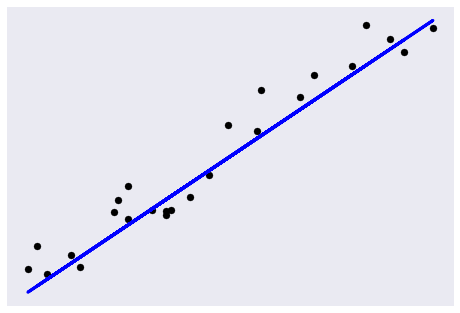

In [68]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [69]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [9755.90974507]
Mean squared error: 45371658.60
Variance score: 0.92
